# Lab8 - Natural Language Processing
## Natural Language Toolkit
###  pip install -U nltk

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

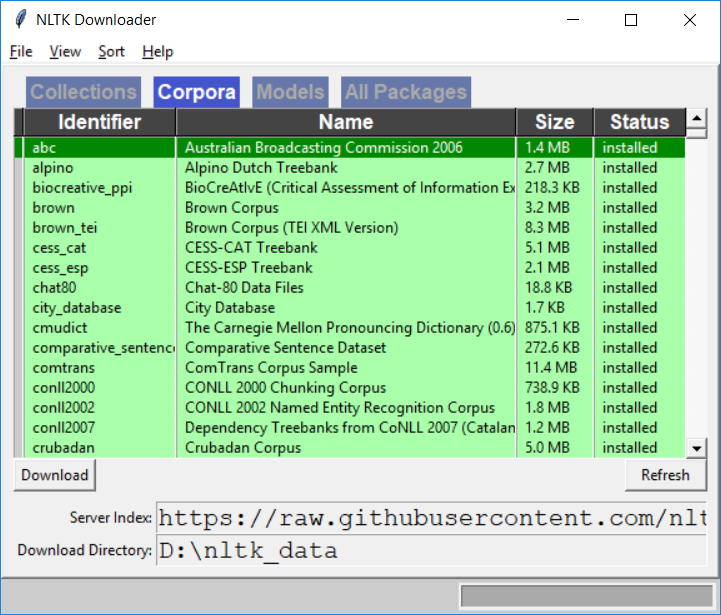

### Install BROWN CORPUS

This Standard Corpus of Present-Day American English consists of 1,014,312 wordsl of running text of edited English prose printed in the United States during the calendar year 1961. So far as it has been possible to determine, the writers were native speakers of American English. Although all of the material first appeared in print in the year 1961, some of it was undoubtedly written earlier. However, no material known to be a second edition or reprint of earlier text has been included.

### Sample of Brown Corpus
However**/wrb** ,**/,** the**/at** jury**/nn** said**/vbd** it**/pps** believes**/vbz** ``/`` these**/dts** two**/cd**  offices**/nns** should**/md** be**/be** combined**/vbn** to**/to** achieve**/vb** greater**/jjr** efficiency**/nn** and**/cc** reduce**/vb** the**/at** cost**/nn** of**/in** administration**/nn** ''/'' ./.

### Tasks
* Compute and visualize bigrams\unigrams of words in Brown Corpora
* Compute and visualize trigrams of letters in Brown Corpora

In [2]:
import nltk
from nltk import bigrams
from nltk.corpus import brown
from collections import Counter

my_words = ['there', 'are', 'too', 'much', 'people']
my_letters = ['c', 'o', 'l', 'l', 'e', 'c', 't', 'i', 'o', 'n', 's']
br_words = brown.words()

In [3]:
#unigrams 
freq_dist = nltk.FreqDist([w.lower() for w in br_words])
total = 0
for word in my_words:
    if word in freq_dist:
        total = total + freq_dist[word]
print('Unigrams:')
for word in my_words:
    if word in freq_dist:
        print('(' + word + '):', '  freq:', freq_dist[word], '   prob:', freq_dist[word]/total)
    else:
        print('(' + word + '):', '  freq:', 0, '   prob:', 0)

Unigrams:
(there):   freq: 2728    prob: 0.28008213552361394
(are):   freq: 4394    prob: 0.451129363449692
(too):   freq: 834    prob: 0.08562628336755647
(much):   freq: 937    prob: 0.0962012320328542
(people):   freq: 847    prob: 0.08696098562628336


In [4]:
# bigrams
bigrams = []
for sent in brown.sents():
    bigrams.extend(nltk.bigrams(sent, pad_left=True, pad_right=True))

bigram_cnt = Counter(bigrams)
bi_total = len(brown.words()) - len(brown.sents())
bigrams = nltk.bigrams(my_words, pad_left=True, pad_right=True)

print('Bigrams:')
for bg in bigrams:
    if bg[0] != None and bg[1] != None:
        prob = bigram_cnt[bg] / bi_total
        print(str(bg), "prob:", str(prob))

Bigrams:
('there', 'are') prob: 0.00018118370941031949
('are', 'too') prob: 1.1776941111670767e-05
('too', 'much') prob: 7.972083214054059e-05
('much', 'people') prob: 0.0


In [5]:
#trigrams: computes the frequency of my_letters' triples in leading 100 words
trigrams = []
tr_total = 0
for word in brown.words()[:100]:
    trigrams.extend(nltk.trigrams(word))
    if len(word) >= 3:
        tr_total = tr_total + len(word) - 2

trigram_cnt = Counter(trigrams)
trigrams = nltk.trigrams(my_letters)

print('Trigrams:')
for tr in trigrams:
    if tr[0] != None and tr[1] != None and tr[2] != None:
        prob = trigram_cnt[tr] / tr_total
        print(str(tr), "prob:", str(prob))

Trigrams:
('c', 'o', 'l') prob: 0.0
('o', 'l', 'l') prob: 0.0
('l', 'l', 'e') prob: 0.0
('l', 'e', 'c') prob: 0.009523809523809525
('e', 'c', 't') prob: 0.009523809523809525
('c', 't', 'i') prob: 0.009523809523809525
('t', 'i', 'o') prob: 0.012698412698412698
('i', 'o', 'n') prob: 0.012698412698412698
('o', 'n', 's') prob: 0.0
